# A Novel Text Mining Approach Based on TF-IDF and Support Vector Machine for News Classification : Implementation


## Load the BBC news dataset 

the dataset is available on kaggle , here is the link : https://www.kaggle.com/datasets/hgultekin/bbcnewsarchive

In [57]:
df = pd.read_csv('bbc-news-data.csv', sep='\t')
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


delete columns 'filename' and 'title' since we wont need it 


In [59]:
df = df.drop(columns=['filename', 'title'])

In [61]:
df

,category,content
0,business,Quarterly profits at US media giant TimeWarne...
1,business,The dollar has hit its highest level against ...
2,business,The owners of embattled Russian oil giant Yuk...
3,business,British Airways has blamed high fuel prices f...
4,business,Shares in UK drinks and food firm Allied Dome...
...,...,...
2220,tech,BT is introducing two initiatives to help bea...
2221,tech,Computer users across the world continue to i...
2222,tech,A new European directive could put software w...
2223,tech,The man making sure US computer networks are ...


Extract the labels from the dataset 

In [173]:
labels = df['category'].unique()
labels

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

## Text preprocessing 

Import necessary library

In [77]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
# Downloading the "punkt" tokenizer
nltk.download('punkt')
# Downloading "wordnet" for lemmatization
nltk.download('wordnet')
# Downloading the list of stopwords
nltk.download('stopwords')
# Creating the lemmatizer
lemmatizer = WordNetLemmatizer()
# Creating the set of English stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
# Definition of the text preprocessing function
def preprocess_text(text):
    # Converting to lowercase
    text = text.lower()

    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    word_tokens = word_tokenize(text)

    # Removing stopwords and lemmatization
    text = [lemmatizer.lemmatize(word) for word in word_tokens if word not in stop_words]
    
    return ' '.join(text)


In [86]:

# Applying the preprocessing to the 'document' column of the DataFrame
df['content'] = df['content'].apply(preprocess_text)

In [88]:
df

,category,content
0,business,quarterly profit u medium giant timewarner jum...
1,business,dollar hit highest level euro almost three mon...
2,business,owner embattled russian oil giant yukos ask bu...
3,business,british airway blamed high fuel price 40 drop ...
4,business,share uk drink food firm allied domecq risen s...
...,...,...
2220,tech,bt introducing two initiative help beat rogue ...
2221,tech,computer user across world continue ignore sec...
2222,tech,new european directive could put software writ...
2223,tech,man making sure u computer network safe secure...


## Test and Train split 

In [92]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [102]:
print(f"Shape of train is: {train_df.shape}")
print(f"Shape of test is: {test_df.shape}")

Shape of train is: (1780, 2)
Shape of test is: (445, 2)


## Feature Extraction using TF-IDF


Import necessary library

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [121]:
# Initialize the vector 
tfidf = TfidfVectorizer()


X_train = tfidf.fit_transform(train_df['content'])

# transform test data using yhe same vector
X_test = tfidf.transform(test_df['content'])

# labels
y_train = train_df['category']
y_test = test_df['category']


In [123]:
X_train.shape

(1780, 27364)

## Classification using Support Vector Machine

Import necessary library

In [147]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


In [140]:
# Create and configure the SVM classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model using the training data
svm_model.fit(X_train, y_train)

# Generate predictions on the test set
predictions = svm_model.predict(X_test)

# Compute performance metrics
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions, average='weighted')
rec = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Output the results
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")


Precision: 0.9731270824509539
Recall: 0.9730337078651685
F1 Score: 0.9730563570291478


In [149]:
# Create a detailed classification report
class_report = classification_report(y_test, predictions, output_dict=True)

# Convert the report dictionary into a DataFrame
report_df = pd.DataFrame(class_report).T

# Print the DataFrame containing precision, recall, and F1-score per class
print(report_df)


               precision    recall  f1-score     support
business        0.964912  0.956522  0.960699  115.000000
entertainment   0.972222  0.972222  0.972222   72.000000
politics        0.948052  0.960526  0.954248   76.000000
sport           1.000000  0.990196  0.995074  102.000000
tech            0.975309  0.987500  0.981366   80.000000
accuracy        0.973034  0.973034  0.973034    0.973034
macro avg       0.972099  0.973393  0.972722  445.000000
weighted avg    0.973127  0.973034  0.973056  445.000000


In [195]:
report_df

,precision,recall,f1-score,support
business,0.964912,0.956522,0.960699,115.000000
entertainment,0.972222,0.972222,0.972222,72.000000
politics,0.948052,0.960526,0.954248,76.000000
sport,1.000000,0.990196,0.995074,102.000000
tech,0.975309,0.987500,0.981366,80.000000
accuracy,0.973034,0.973034,0.973034,0.973034
macro avg,0.972099,0.973393,0.972722,445.000000
weighted avg,0.973127,0.973034,0.973056,445.000000


## Prediction 

In [155]:
sample_test_documents = test_df['content'].iloc[:10]
sample_test_labels = test_df['category'].iloc[:10]

# Transforming the samples into TF-IDF vectors
sample_test_vectors = vectorizer.transform(sample_test_documents)

# Making predictions on the samples
sample_predictions = classifier.predict(sample_test_vectors)

# Displaying the actual and predicted labels
for i in range(len(sample_test_labels)):
    print(f"Document: {sample_test_documents.iloc[i][:100]}...")  # Displaying the first 100 characters
    print(f"Actual Label: {sample_test_labels.iloc[i]}")
    print(f"Predicted Label: {sample_predictions[i]}")
    print("\n")


Document: uk house price dipped slightly november office deputy prime minister odpm said average house price f...
Actual Label: business
Predicted Label: business


Document: london stock exchange lse planning announce preferred takeover end month newspaper report claim sund...
Actual Label: business
Predicted Label: business


Document: number eight imanol harinordoquy dropped france squad six nation match ireland dublin 12 march harin...
Actual Label: sport
Predicted Label: sport


Document: share uk banking group barclays risen monday following weekend press report held merger talk u bank ...
Actual Label: business
Predicted Label: business


Document: labour conservative still telephoning million people signed make sure get marketing cold call party ...
Actual Label: politics
Predicted Label: politics


Document: glenn hoddle unveiled new wolf manager exengland coach given sixmonth contract succeed dave jones sa...
Actual Label: sport
Predicted Label: sport


Document: daniela hant

## Confusion matrix

Import necessair library

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [165]:
conf_mat = confusion_matrix(y_test, y_pred)

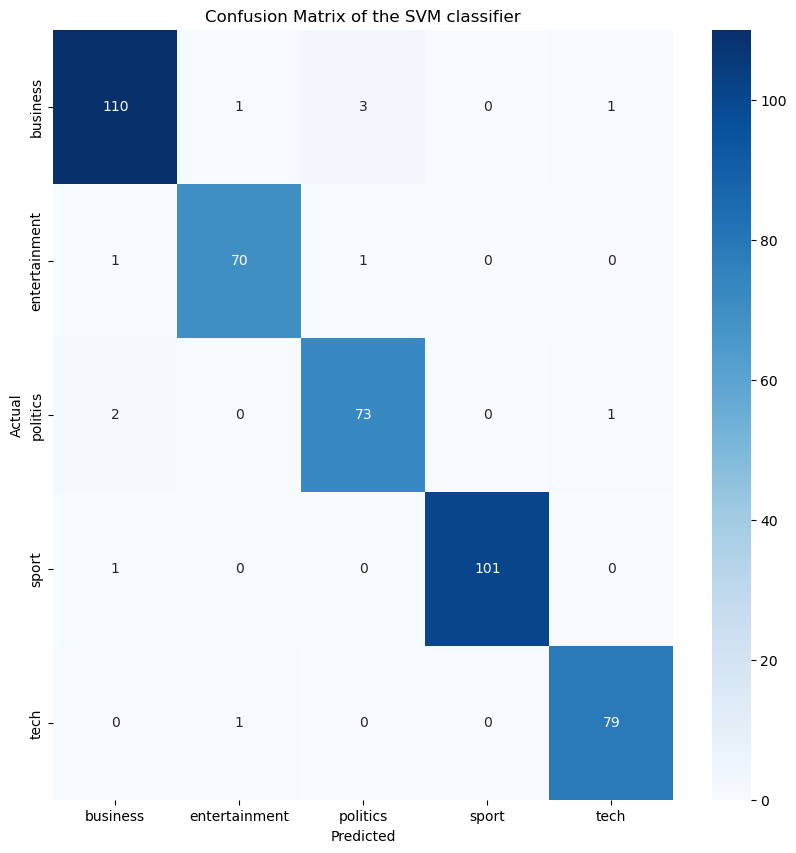

In [179]:
plt.figure(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=labels, yticklabels=labels,
            cmap='Blues')  # palette claire

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the SVM classifier')
plt.show()
